Problem 1: Read in the Sacramento housing data set.

In [3]:
## Problem 1
import pandas as pd
new_data_total = pd.read_csv('sacramento_real_estate_transactions.csv', sep=',')
print(new_data_total)

                              street             city    zip state  beds  \
0                       3526 HIGH ST       SACRAMENTO  95838    CA     2   
1                        51 OMAHA CT       SACRAMENTO  95823    CA     3   
2                     2796 BRANCH ST       SACRAMENTO  95815    CA     2   
3                   2805 JANETTE WAY       SACRAMENTO  95815    CA     2   
4                    6001 MCMAHON DR       SACRAMENTO  95824    CA     2   
5                 5828 PEPPERMILL CT       SACRAMENTO  95841    CA     3   
6                6048 OGDEN NASH WAY       SACRAMENTO  95842    CA     3   
7                      2561 19TH AVE       SACRAMENTO  95820    CA     3   
8    11150 TRINITY RIVER DR Unit 114   RANCHO CORDOVA  95670    CA     2   
9                       7325 10TH ST        RIO LINDA  95673    CA     3   
10                  645 MORRISON AVE       SACRAMENTO  95838    CA     3   
11                     4085 FAWN CIR       SACRAMENTO  95823    CA     3   
12          

In [4]:
new_data_total.describe(include='all') 


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
count,985,985,985.000000,985,985.000000,985.000000,985.000000,985,985,985.000000,985.000000,985.000000
unique,981,39,NaN,2,NaN,NaN,NaN,4,5,NaN,NaN,NaN
top,4734 14TH AVE,SACRAMENTO,NaN,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,NaN,NaN,NaN
freq,2,439,NaN,984,NaN,NaN,NaN,917,268,NaN,NaN,NaN
mean,NaN,NaN,95750.697462,NaN,2.911675,1.776650,1312.918782,NaN,NaN,233715.951269,38.445121,-121.193371
std,NaN,NaN,85.176072,NaN,1.307932,0.895371,856.123224,NaN,NaN,139088.818896,5.103637,5.100670
min,NaN,NaN,95603.000000,NaN,0.000000,0.000000,-984.000000,NaN,NaN,-210944.000000,-121.503471,-121.551704
25%,NaN,NaN,95660.000000,NaN,2.000000,1.000000,950.000000,NaN,NaN,145000.000000,38.482704,-121.446119
50%,NaN,NaN,95762.000000,NaN,3.000000,2.000000,1304.000000,NaN,NaN,213750.000000,38.625932,-121.375799
75%,NaN,NaN,95828.000000,NaN,4.000000,2.000000,1718.000000,NaN,NaN,300000.000000,38.695589,-121.294893


Problem 2: Conduct exploratory data analysis on this data set. Report any notable findings here and any steps you take to clean/process data.

Hint: These EDA checks will be on every data set we give you. If checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [5]:
## Problem 2

new_data  = new_data_total.loc[new_data_total['sq__ft'] > 0]
new_data  = new_data.loc[new_data['beds'] > 0]
new_data  = new_data.loc[new_data['baths'] > 0]
new_data  = new_data.loc[new_data['price'] > 10000]
new_data  = new_data.loc[new_data['type'] != 'Unknown']
new_data.shape

#new_data=new_data_total[new_data_total.sq__ft>0]
#new_data.shape

(812, 12)

Problem 3: Our goal will be to predict price. List the variables that qualify as available predictors in a SLR model. For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.

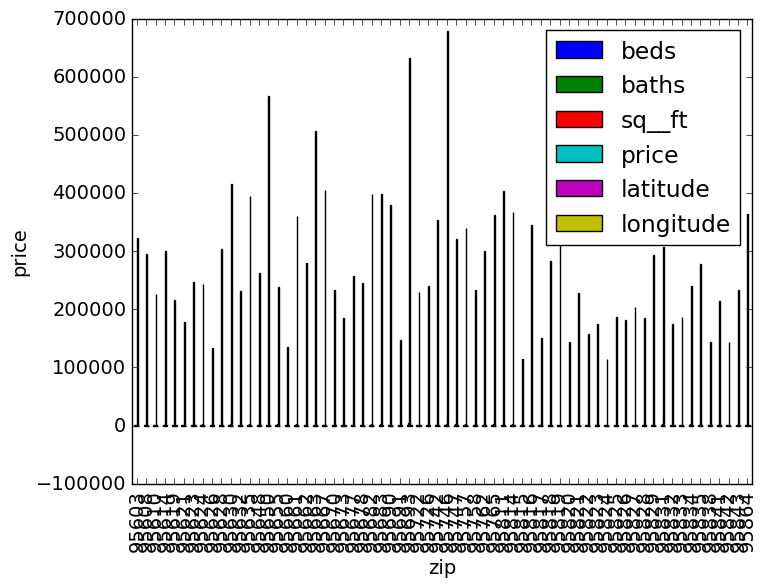

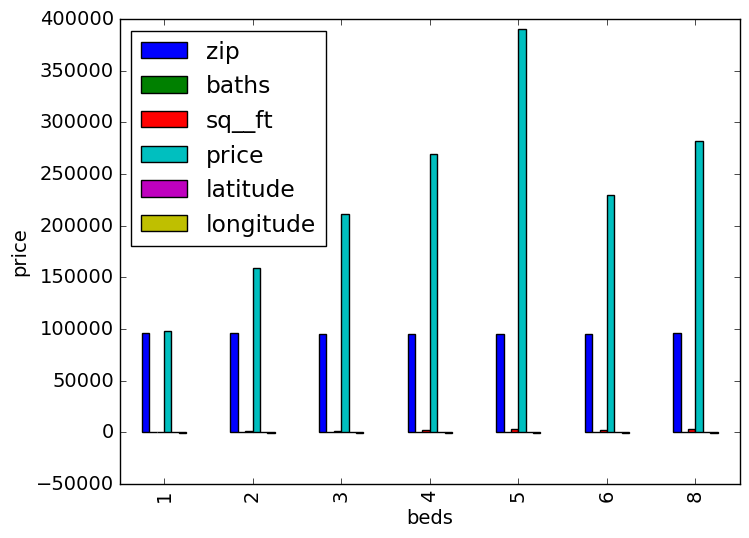

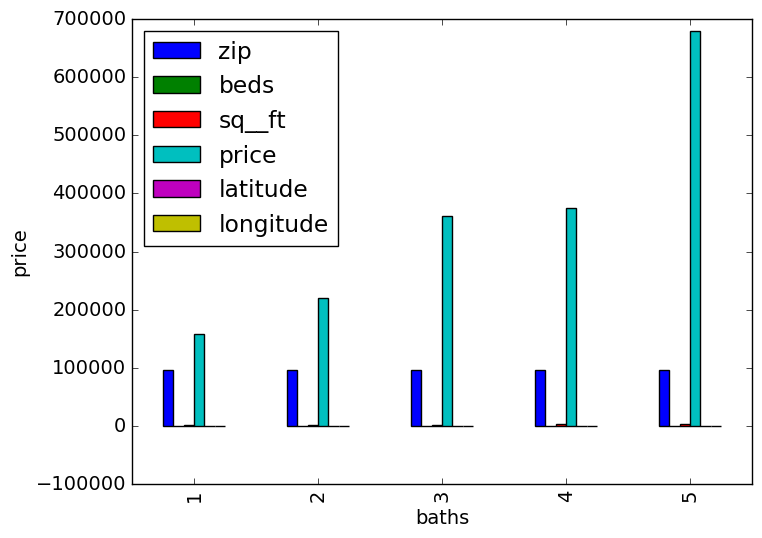

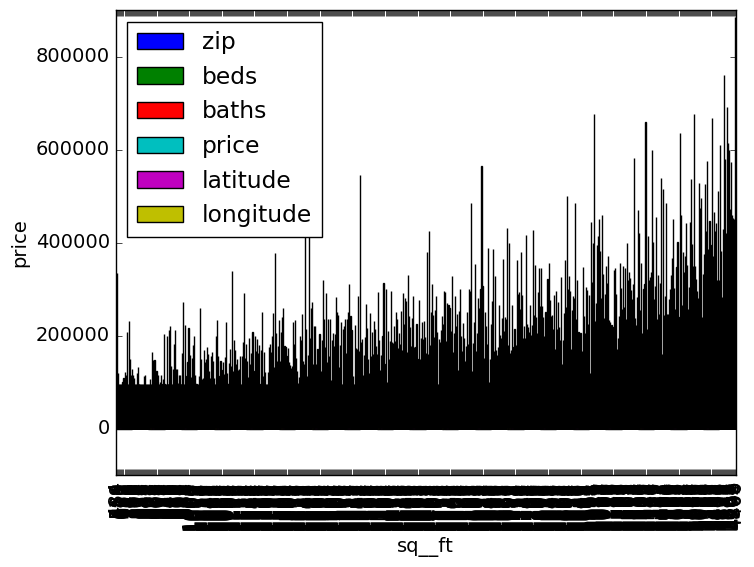

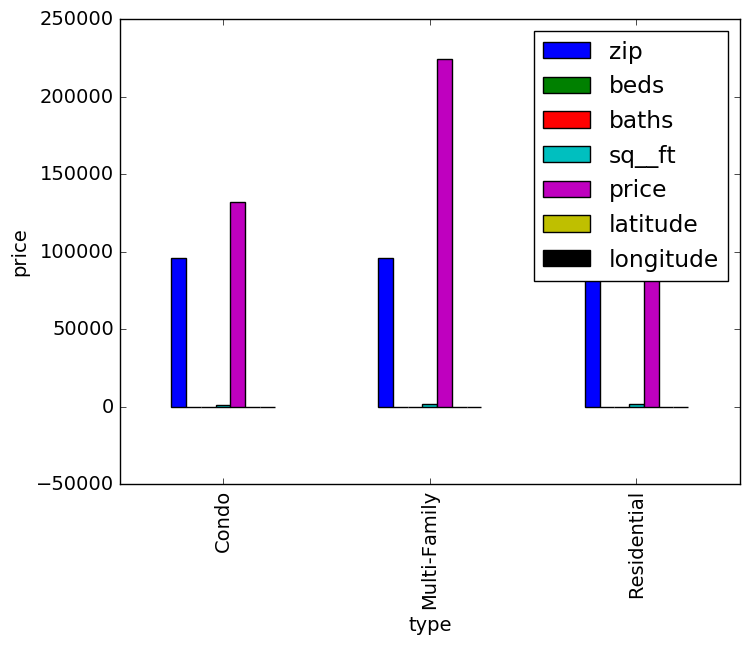

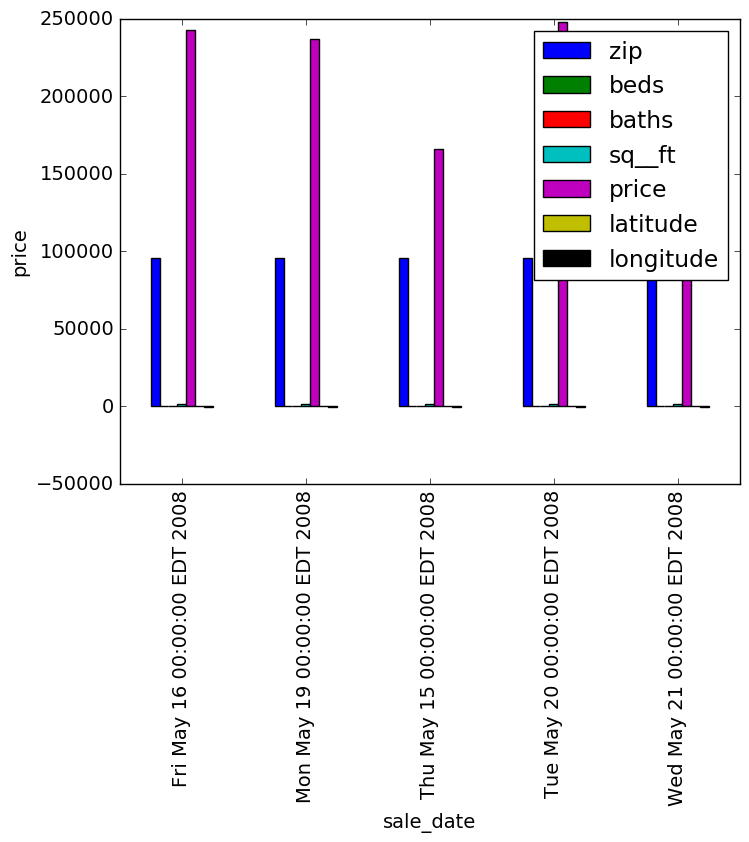

In [6]:
## Problem 3
import pandas as pd
import matplotlib.pyplot as plt

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

new_data.groupby('zip').mean().plot(kind='bar')
plt.xlabel('zip')
plt.ylabel('price')

new_data.groupby('beds').mean().plot(kind='bar')
plt.xlabel('beds')
plt.ylabel('price')

new_data.groupby('baths').mean().plot(kind='bar')
plt.xlabel('baths')
plt.ylabel('price')

new_data.groupby('sq__ft').mean().plot(kind='bar')
plt.xlabel('sq__ft')
plt.ylabel('price')

new_data.groupby('type').mean().plot(kind='bar')
plt.xlabel('type')
plt.ylabel('price')

new_data.groupby('sale_date').mean().plot(kind='bar')
plt.xlabel('sale_date')
plt.ylabel('price')



Problem 4: Which independent variable would be the best predictor of Y in a SLR model? Why?

In [60]:
## Problem 4
# I think zip code(or othe parameter show the location) is the best predictor of Y because we have more data for eah group in zip code.



Problem 5: Build a function that will take in lists Y and X and returns the estimates that minimize SSE. Test your function on price and the variable you determined was best in Problem 4. Report the slope and Y-intercept.

In [8]:
## Problem 5

def slope_prediction(list_Y,list_X):
    import numpy as np
    x_standard_deviaton=np.std(list_Y,ddof=1)
    y_standard_deviaton=np.std(list_X,ddof=1)
    covariance_x_y=np.corrcoef(list_Y,list_X)[0, 1]
    beta1 = covariance_x_y*y_standard_deviaton/x_standard_deviaton
    return beta1

def y_intercept_list(list_Y,list_X):
    import numpy as np
    x_standard_deviaton=np.std(list_Y,ddof=1)
    y_standard_deviaton=np.std(list_X,ddof=1)
    covariance_x_y=np.corrcoef(list_Y,list_X)[0, 1]
    beta1 = covariance_x_y*y_standard_deviaton/x_standard_deviaton
    mean_Y = np.mean(list_Y)
    mean_X = np.mean(list_X)
    beta0 = mean_Y - beta1*mean_X
    return beta0



def S_S_E(list_Y,list_X):
    import numpy as np
    x_standard_deviaton=np.std(list_Y,ddof=1)
    y_standard_deviaton=np.std(list_X,ddof=1)
    covariance_x_y=np.corrcoef(list_Y,list_X)[0, 1]
    beta1 = covariance_x_y*y_standard_deviaton/x_standard_deviaton
    mean_Y = np.mean(list_Y)
    mean_X = np.mean(list_X)
    beta0 = mean_Y - beta1*mean_X
    a= (list_Y -(beta0+beta1*list_X))**2
    return a.sum()



In [9]:
list_X = new_data['beds'] 
list_Y = new_data ['price'] 
print(slope_prediction(list_Y,list_X))
print(y_intercept_list(list_Y,list_X))
print(S_S_E(list_Y,list_X))


3.14886874787e-06
229751.267231
1.1621041464e+13


Problem 6: Interpret the Y-intercept. Does it make sense to interpret the Y-intercept here?

In [ ]:
## Problem 6 
# Yes. It makes sense to interpret the Y-intercept here. The money you have to have to start to search for a house is Y-intercept


Problem 7: Give an example of how this model could be used for prediction and how this model could be used for inference. Be sure to make it clear which example is associated with prediction and which is associated with inference.

In [91]:
## Problem 7
#EX_1 = eaqrthquake line (inference), the distance to public transportation
#EX_2 = if x = beds --> y = price of the house


Bonus: Using the model you came up with in Problem 5, calculate and plot the residuals.

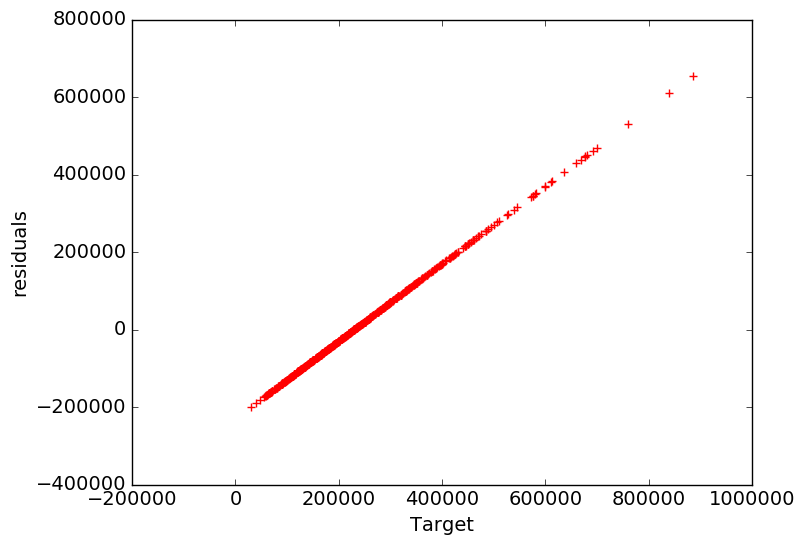

In [12]:
## BONUS
list_X = new_data['beds'] 
list_Y = new_data ['price'] 
beta1 = slope_prediction(list_Y,list_X)
beta0= y_intercept_list(list_Y,list_X)

a= (list_Y-(beta0+beta1*list_X))
a


plt.scatter(list_Y,a, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Target")
plt.ylabel("residuals")
plt.show()


